# 697
### Starting from here, we enter our second half. First, let's try running a linear regression on our data.

In [1]:
#Hit Run After, starting from this code block.

In [2]:
#imports, run first.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#tool for showing values on bar charts
def show_values_on_bars(axs, space=0.4):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            if np.isnan(p.get_width()):
                break
            value = int(p.get_width())
            ax.text(_x, _y, str(value) + " described", ha="left")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [3]:
# Read data from file
raw = pd.read_csv("../input/cleaned-cqi-arabica-coffee-data/arabica_data_cleaned_update.csv")
print (raw.count())
# removing unnecessary fields
raw = raw.drop(columns="ID")
#removing outlier coffees
raw = raw.drop([1310])
# WHY did we drop this? 

#establish field name
data = raw[['Country', 'Variety', 'Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Processing.Method','Total.Cup.Points']]
data.count()

ID                        1311
Species                   1311
Owner                     1304
Country                   1310
Farm                       955
Lot                        270
Mill                      1001
ICO                       1165
Company                   1102
Altitude                  1088
Region                    1254
Producer                  1081
Number.of.Bags            1311
Bag.Weight                1311
In.Country.Partner        1311
Harvest.Year              1264
Grading.Date              1311
Owner.1                   1304
Variety                   1110
Processing.Method         1159
Aroma                     1311
Flavor                    1311
Aftertaste                1311
Acidity                   1311
Body                      1311
Balance                   1311
Uniformity                1311
Clean.Cup                 1311
Sweetness                 1311
Cupper.Points             1311
Total.Cup.Points          1311
Moisture                  1311
Category

Country              1309
Variety              1109
Aroma                1310
Flavor               1310
Aftertaste           1310
Acidity              1310
Body                 1310
Balance              1310
Uniformity           1310
Clean.Cup            1310
Sweetness            1310
Cupper.Points        1310
Processing.Method    1159
Total.Cup.Points     1310
dtype: int64

In [4]:
#check for any null/missing values
data = data.dropna()
data = data.reset_index().drop(columns="index") # DONT FORGET TO RESET YOUR INDEX WHEN YOU REMOVE ROWS!
data.count()
data.tail()
# we have 1086 rows to work with.

,Country,Variety,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Processing.Method,Total.Cup.Points
1081,Honduras,Catuai,7.00,6.33,6.17,6.50,6.67,6.17,8.00,8.00,8.00,6.33,Washed / Wet,69.17
1082,Mexico,Bourbon,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,Washed / Wet,68.33
1083,Haiti,Typica,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,Natural / Dry,67.92
1084,Nicaragua,Caturra,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,Other,63.08
1085,Guatemala,Catuai,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,6.67,Washed / Wet,59.83


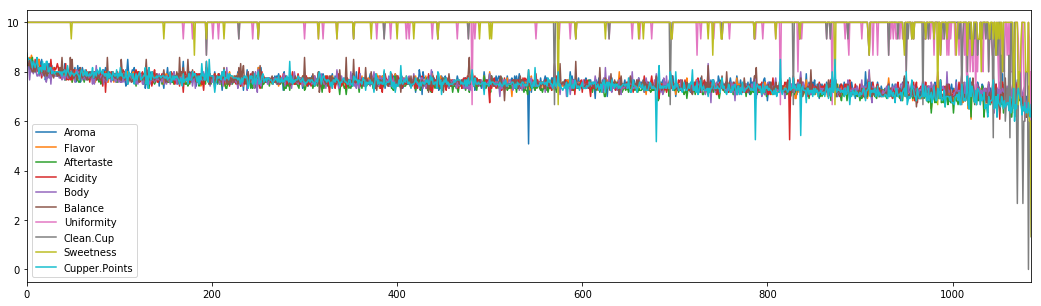

In [5]:
#examine a graph of the numerical values
features = data.drop(columns = "Total.Cup.Points")
features.plot(figsize=(18,5))

In [6]:
target = data['Total.Cup.Points']
# now we have features and target separated if needed.
# data = full set
# target = Total Cup Points
# features =
#Country	Variety		Aroma		Flavor		Aftertaste		Acidity		Body
#Balance	Uniformity	Clean.Cup	Sweetness	Cupper.Points	Processing.Method

## Linear Regression
### It's time to do a linear regression on our numerical data. We don't expect anything wild.

In [7]:
# Necessary imports: 
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Establish features (JUST THE NUMERICAL COLUMNS) and target
X = features[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points']];
y = target;

#set up test/training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(868, 10) (868,)
(218, 10) (218,)


Mean squared error: 0.00
Coefficient of determination: 1.00
Coefficients:
Aroma - 1.003527221594951
Flavor - 0.9968042389713974
Aftertaste - 1.0060905771533704
Acidity - 0.9979144632068446
Body - 1.002493034522572
Balance - 1.0035183668726873
Uniformity - 1.0052172191536952
Clean.Cup - 1.0008660395861007
Sweetness - 0.998234108715055
Cupper.Points - 0.9913567775466895
Score: 0.9999840712589005


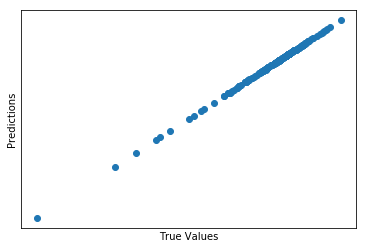

In [8]:
# create model... hello again object oriented programming
lm = linear_model.LinearRegression()
# fit model to training set
model = lm.fit(X_train, y_train)


# you have a model now!
#time to test it.

#make predictions using testing set
predictions = lm.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))
# The coefficients
print("Coefficients:")
for x in X_test.columns:
    print(x, "-",lm.coef_[X_test.columns.get_loc(x)])
# Check R^2 Score
print("Score:", model.score(X_test, y_test))

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.xticks(())
plt.yticks(())

plt.show()

## PCA Part 2
### Okay! Let's look at adding text values to PCA.

In [9]:
# creating arrays of features and targets
X = features.values
y = data.loc[:,['Total.Cup.Points']].values
# standardize the data
from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

### Running this gives us an error. We will need to convert our categorical data to numerical data. One option is to use One Hot encoding.

In [10]:
#let's check our types.
print(features.dtypes)
# we don't want these "object" types.
OHE_features = pd.get_dummies(features)
#let's check our new set of One Hot Encoded features.
print(OHE_features.dtypes)

Country               object
Variety               object
Aroma                float64
Flavor               float64
Aftertaste           float64
Acidity              float64
Body                 float64
Balance              float64
Uniformity           float64
Clean.Cup            float64
Sweetness            float64
Cupper.Points        float64
Processing.Method     object
dtype: object
Aroma                                          float64
Flavor                                         float64
Aftertaste                                     float64
Acidity                                        float64
Body                                           float64
                                                ...   
Processing.Method_Natural / Dry                  uint8
Processing.Method_Other                          uint8
Processing.Method_Pulped natural / honey         uint8
Processing.Method_Semi-washed / Semi-pulped      uint8
Processing.Method_Washed / Wet                   uint8
Leng

In [11]:
# standardizing an array of features
X = OHE_features.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
target = pd.DataFrame(data=y, columns=["target"])

In [12]:
#beginning PCA
from sklearn.decomposition import PCA
#create pca object
pca = PCA(n_components=2)
#fit features
principalComponents = pca.fit_transform(X)
#set up temp data frame
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#include target
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf['Rating'] = np.where(finalDf['target']>=83.6, 'Above Average', 'Average')
finalDf['Rating'] = np.where(finalDf['target']<=81.1, 'Below Average',finalDf['Rating'] )
print(finalDf.tail(10))

      principal component 1  principal component 2  target         Rating
1076               5.957119               0.980676   71.08  Below Average
1077               7.364557               0.380206   71.00  Below Average
1078               6.315830               0.822903   70.75  Below Average
1079               9.212302               1.281532   69.33  Below Average
1080               9.482129               1.180916   69.17  Below Average
1081               9.432755               1.220655   69.17  Below Average
1082               6.595975               0.398801   68.33  Below Average
1083               8.443576               3.580322   67.92  Below Average
1084              10.572696               3.187475   63.08  Below Average
1085               7.360441               3.044034   59.83  Below Average


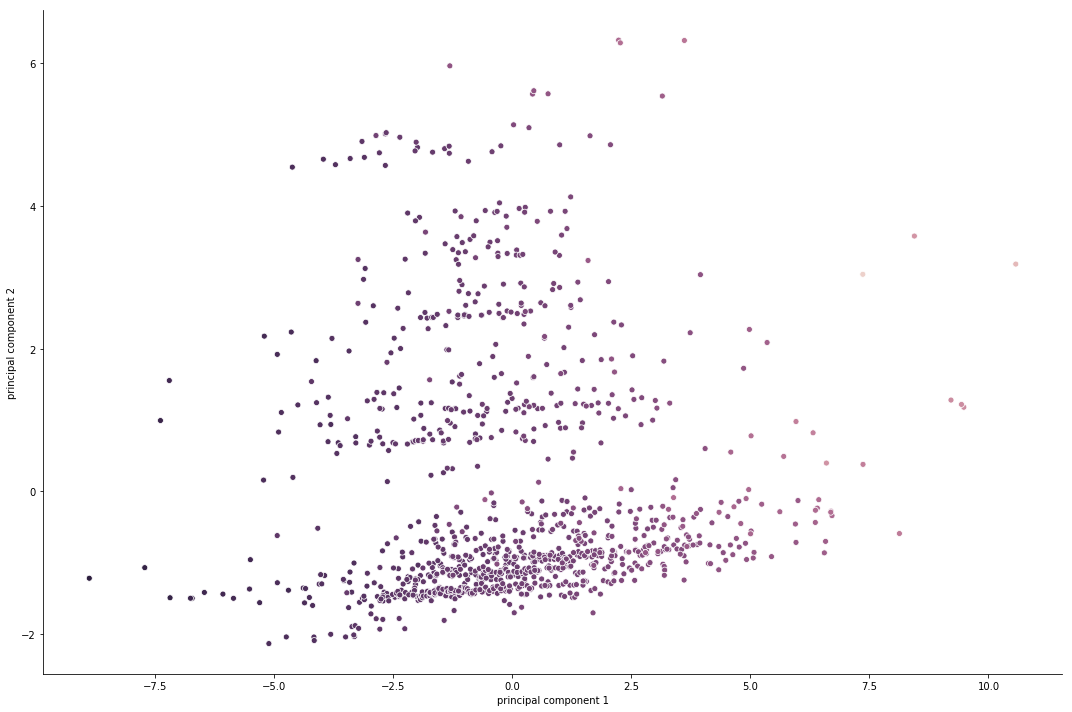

In [13]:
sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'target', legend = False, height=10, aspect=1.5, data = finalDf)

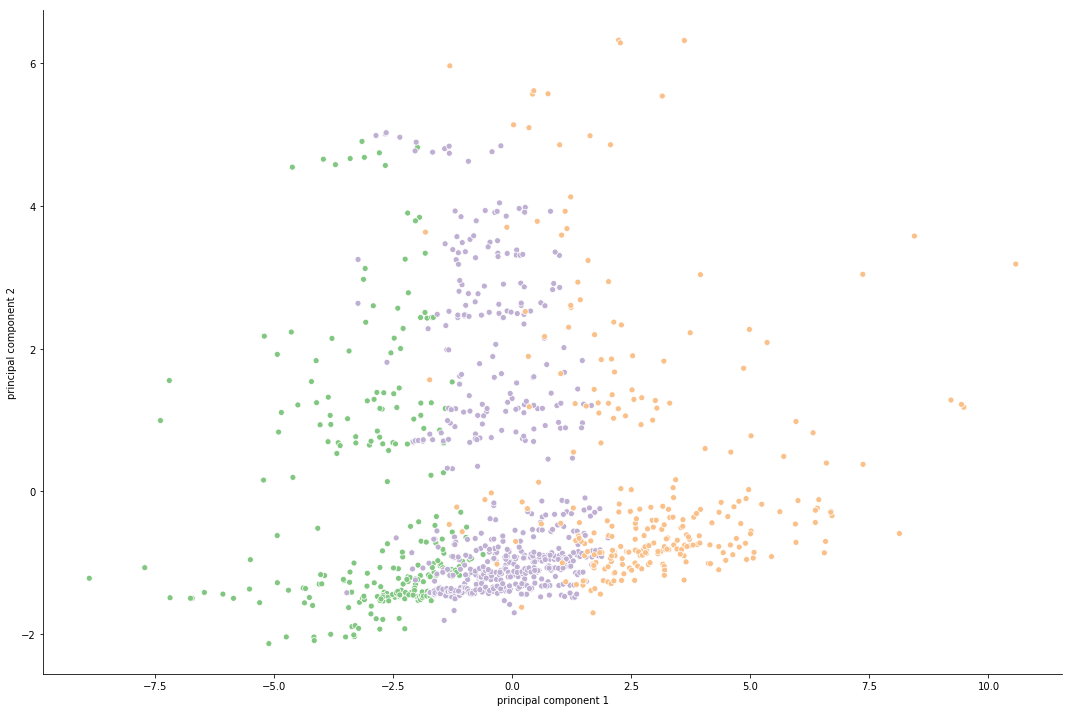

In [14]:
sns.set_palette("Accent", n_colors=3, desat=0.95)
sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'Rating', legend = False, height=10, aspect=1.5, data = finalDf)

## Meeting Notes 02/12/2020
### TODO items from last meeting:

- Look at Kaggle as an option for online Jupyter Notebooks
- Reacquaint myself with the data and my PCA
- Add Variety, Processing, and Country to PCA
- Make a linear regression model with the subscores

---

### New TODO

- Why did we drop that coffee? for documentation
- Check if PCA runs with OHE variables
- number of components needed for certain amount of variability
- method to separate component's components
- share to KAGGLE 

---
 
### Future TODO
 
- linear regression including OHE must include scaling
- look at random forest for prediction

## Why did we drop that coffee?

In [15]:
# Read data from file
why = pd.read_csv("../input/cleaned-cqi-arabica-coffee-data/arabica_data_cleaned_update.csv")
#removing outlier coffees
why.loc[1310] #remove ; to see output

ID                                                            1312
Species                                                    Arabica
Owner                                              bismarck castro
Country                                                   Honduras
Farm                                                  los hicaques
Lot                                                            103
Mill                                            cigrah s.a de c.v.
ICO                                                     13-111-053
Company                                          cigrah s.a de c.v
Altitude                                                      1400
Region                                                   comayagua
Producer                                           Reinerio Zepeda
Number.of.Bags                                                 275
Bag.Weight                                                   69 kg
In.Country.Partner                    Instituto Hondureño del 

### Examining the output, I see why we dropped this row - all the tasting notes are 0, clearly an anomaly.

## Check if PCA runs with OHE Variables
### https://stackoverflow.com/questions/40795141/pca-for-categorical-features
#### It runs, but may not generate meaningful results 
#### "PCA is desinged for continuous variables. It tries to minimize variance (=squared deviations). The concept of squared deviations breaks down when you have binary variables."
### http://www.gastonsanchez.com/visually-enforced/how-to/2012/10/13/MCA-in-R/
#### This could be an alternative, Multiple Correspondence Analysis. Will need to research on the math behind it.
### https://arxiv.org/pdf/0711.4452.pdf
#### Academic, could use normal simplex expressions of categorical data in PCA

## Number of components needed for certain amount of variability:

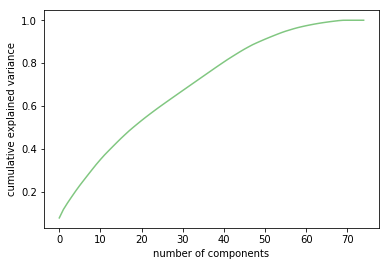

In [16]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Already much different in the scree plot. Keeping 80%+ variance will still require nearly 50 components. Let's try finding exact numbers.

In [17]:
# run with multiple variance
variance = [0.95, 0.90, 0.85, 0.80, 0.75, 0.7]
for i in variance:
    pca = PCA(i) #sets the variance we want
    principalComponents = pca.fit_transform(X)
    print("To maintain a", i,  "variance, we need", pca.n_components_, "components.")

To maintain a 0.95 variance, we need 57 components.
To maintain a 0.9 variance, we need 50 components.
To maintain a 0.85 variance, we need 45 components.
To maintain a 0.8 variance, we need 41 components.
To maintain a 0.75 variance, we need 37 components.
To maintain a 0.7 variance, we need 34 components.


### What does this mean? 
Our data does not have clear delineations so far, and cannot be easily visualized. We did start with 75 columns though, so around 25 columns can be combined and still maintain 90% variance. Therefore, the first 50 eigenvectors should probably be used to construct the dimensions for the new feature space.

## A method to separate component's components
How will we find out what each component is made of after PCA? Starting by reading chapter 18.5 of this stats lecture https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf

In [18]:
#create pca object
pca = PCA(n_components=2)
#fit features
principalComponents = pca.fit_transform(X)
#set up temp data frame
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#include target
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf['Rating'] = np.where(finalDf['target']>=83.6, 'Above Average', 'Average')
finalDf['Rating'] = np.where(finalDf['target']<=81.1, 'Below Average',finalDf['Rating'] )
# Dump components relations with features:
componentAnalysis = pd.DataFrame(pca.components_,columns=OHE_features.columns,index = ['PC-1','PC-2']);
#print(componentAnalysis)
#maybe make this into a prettier plot
componentAnalysis.sum(axis =1)

PC-1   -3.221401
PC-2    0.183584
dtype: float64

In [19]:
#create pca object
pca = PCA(n_components=3)
#fit features
principalComponents = pca.fit_transform(X)
#set up temp data frame
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#include target
finalDf = pd.concat([principalDf, target], axis = 1)
finalDf['Rating'] = np.where(finalDf['target']>=83.6, 'Above Average', 'Average')
finalDf['Rating'] = np.where(finalDf['target']<=81.1, 'Below Average',finalDf['Rating'] )
# Dump components relations with features:
componentAnalysis = pd.DataFrame(pca.components_,columns=OHE_features.columns,index = ['PC-1','PC-2','PC-3']);
#print(componentAnalysis)
#maybe make this into a prettier plot
componentAnalysis.sum(axis =1)

PC-1   -3.221391
PC-2    0.185303
PC-3   -1.179967
dtype: float64

## Meeting Notes 02/12/2020
### TODO items from last meeting:

- Why did we drop that coffee? for documentation
- Check if PCA runs with OHE variables
- number of components needed for certain amount of variability
- method to separate component's components
- share to KAGGLE 

---

### New TODO

- What is PCA.components_
- How to print for all 75 factors
- make a linear regression including scaled OHE features

---
 
### Future TODO

- look at random forest for prediction
- look at different targets
- When does PCA break down? (report in paper and explain why it changed with removal of numerical data)
- "Limitations" section on data


- record and drop coffees that were predicted wild.
- Summary statistics for categoricals?
- When does PCA break down 
    = doesn't work well for categorical data, especially OHE because it's not continuous 
- anova?
    = testing different models, for example comparing PCA with and without numeric data

https://stats.stackexchange.com/questions/311908/what-is-pca-components-in-sk-learn#:~:text=components_%20is%20the%20set%20of,have%20the%20eigenvectors%20using%20pca

basically, components_ returns our eigenvectors, while explained_variance_ returns our eigenvalues.

In [20]:
#let's move back to all our components.
pca = PCA().fit(X)
pca.components_;
eigenvalues = pca.explained_variance_;
print((pca.explained_variance_ratio_*100));
print(OHE_features.columns)

[7.80552025e+00 3.93568654e+00 3.04870888e+00 2.83250794e+00
 2.76804545e+00 2.63334256e+00 2.47917335e+00 2.46367742e+00
 2.42311000e+00 2.39554275e+00 2.24217588e+00 2.14253835e+00
 1.97188304e+00 1.93817598e+00 1.92362279e+00 1.88942260e+00
 1.79928512e+00 1.76130525e+00 1.63740075e+00 1.58780023e+00
 1.55829271e+00 1.51828681e+00 1.46475212e+00 1.43598679e+00
 1.41772212e+00 1.37985156e+00 1.36210557e+00 1.35428826e+00
 1.34771469e+00 1.34627391e+00 1.34312248e+00 1.34000600e+00
 1.33953574e+00 1.33818953e+00 1.33757802e+00 1.33726260e+00
 1.33624691e+00 1.33525729e+00 1.33476808e+00 1.31221275e+00
 1.29507484e+00 1.28148050e+00 1.20985853e+00 1.19982750e+00
 1.17848489e+00 1.12748382e+00 1.05737299e+00 1.01927589e+00
 8.85918223e-01 8.43934735e-01 8.33477818e-01 7.89928261e-01
 7.77678704e-01 7.61079834e-01 7.32966454e-01 6.65285967e-01
 5.83579798e-01 5.79706297e-01 5.24992684e-01 4.51548261e-01
 4.24804570e-01 3.85493808e-01 3.70180442e-01 3.30654619e-01
 3.08595202e-01 2.747246

In [21]:
#let's try with ONLY categoricals.
OHE_X = OHE_features.drop(columns=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points']);
print("(Rows, Features) :",OHE_X.shape);
pca = PCA().fit(OHE_X);
print("Explained variance by first 3 components:", sum(pca.explained_variance_ratio_[:3]*100));

print();
for count, component in enumerate(pca.components_):
    composition = "";
    print("*** Explained variance:",round(pca.explained_variance_ratio_[count],2),"by component #", count+1, "***");
    first = True;
    for value, name in zip(component, OHE_X.columns):
        if(abs(round(value,2)) >= 0.05):
            if first:
                composition += "(%.2f * %s)" % (value, name);
                first = False;
            else: 
                composition += " + ";
                composition += "(%.2f * %s)" % (value, name);
    print(composition, "\n");

(Rows, Features) : (1086, 65)
Explained variance by first 3 components: 45.19066065950301

*** Explained variance: 0.18 by component # 1 ***
(0.29 * Country_Brazil) + (-0.13 * Country_Guatemala) + (-0.21 * Country_Mexico) + (0.10 * Country_United States (Hawaii)) + (-0.08 * Variety_Caturra) + (0.10 * Variety_Hawaiian Kona) + (-0.12 * Variety_Typica) + (0.08 * Variety_Yellow Bourbon) + (0.57 * Processing.Method_Natural / Dry) + (0.07 * Processing.Method_Semi-washed / Semi-pulped) + (-0.68 * Processing.Method_Washed / Wet) 

*** Explained variance: 0.14 by component # 2 ***
(-0.35 * Country_Colombia) + (-0.06 * Country_Costa Rica) + (-0.15 * Country_Guatemala) + (0.49 * Country_Mexico) + (0.12 * Country_Taiwan) + (-0.54 * Variety_Caturra) + (0.53 * Variety_Typica) + (0.08 * Processing.Method_Semi-washed / Semi-pulped) + (-0.10 * Processing.Method_Washed / Wet) 

*** Explained variance: 0.13 by component # 3 ***
(0.11 * Country_Brazil) + (-0.29 * Country_Colombia) + (0.47 * Country_Guatem

### Country
Mexico 
Mexico 
Mexico 
Guatemala 
Guatemala 
Guatemala 
Brazil 
Brazil 
Colombia 
Colombia 
Taiwan 
Taiwan 
United States (Hawaii)
Costa Rica 

### Variety
Typica 
Typica 
Typica 
Caturra 
Caturra 
Caturra 
Hawaiian Kona 
Yellow Bourbon 
Bourbon

### Processing.Method
Washed / Wet
Washed / Wet
Washed / Wet
Semi-washed / Semi-pulped 
Semi-washed / Semi-pulped 
Natural / Dry

In [22]:
#scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(OHE_features)
scaled_features_df = pd.DataFrame(X, index=OHE_features.index, columns=OHE_features.columns)
scaled_features_df.head()

#set up test/training sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

# fit model to training set
lm = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False).fit(X_train, y_train)
# you have a model now!
#time to test it.

(868, 75) (868, 1)
(218, 75) (218, 1)


In [23]:
#make predictions using testing set
predictions = lm.predict(X_test)
print(predictions[:10])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))
# The coefficients
print("Coefficients:")
for x in X_test.columns:
    print("%s -" %x, lm.coef_[0][X_test.columns.get_loc(x)])
# Check R^2 Score
print("Score:", model.score(X_test, y_test))
## The line / model

#total = np.array([predictions,y_test])
#df = pd.DataFrame(data=total)
#df.head()

#predict = pd.Series(predictions.tolist())

#print(predict)
#sns.scatterplot(data = df)
#sns.xlabel("True Values")
#sns.ylabel("Predictions")
#sns.plot([0,100],[0,100])
#sns.xticks(())
#sns.yticks(())
plt.scatter(predictions, y_test)
plt.show()

[[ 8.18162165e+01]
 [ 8.22521296e+01]
 [ 8.14219294e+01]
 [ 8.19963923e+01]
 [ 8.33967829e+01]
 [-6.30036338e+12]
 [ 8.29354792e+01]
 [ 8.12610407e+01]
 [ 7.76528864e+01]
 [ 8.27361383e+01]]
Mean squared error: 187122887263672969723904.00
Coefficient of determination: -24564043182546559696896.00
Coefficients:
Aroma - 0.30405480016824676
Flavor - 0.3266316451391019
Aftertaste - 0.33890564445495897
Acidity - 0.30091081181285084
Body - 0.2741477683564316
Balance - 0.34140273323442627
Uniformity - 0.4777058335902944
Clean.Cup - 0.7514693128515528
Sweetness - 0.4498787978027982
Cupper.Points - 0.3878291759805209
Country_Brazil - -85099294908.01775
Country_Burundi - 23230423231.984074
Country_China - -33982598977.93598
Country_Colombia - -93939538483.05684
Country_Costa Rica - -56212944141.544785
Country_El Salvador - -35012088988.73069
Country_Ethiopia - -31817504986.72529
Country_Guatemala - -102488917917.19254
Country_Haiti - -19094248022.18538
Country_Honduras - -57393328617.496124
Count

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 75)

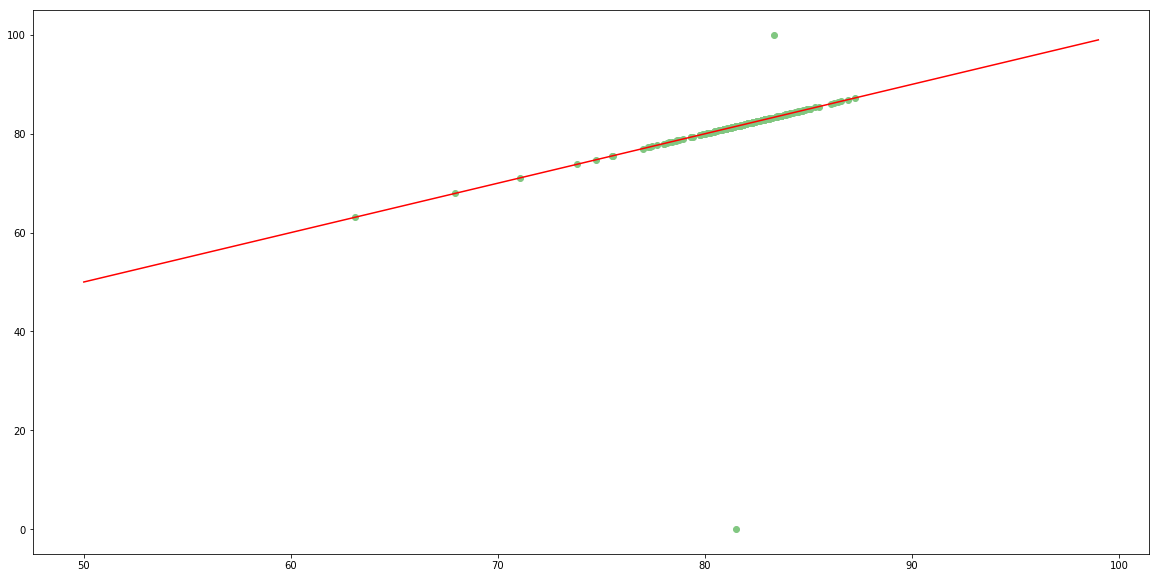

In [24]:









lm_df = pd.DataFrame(data = X_test)
lm_df['Target_Score'] = y_test
lm_df['Predicted'] = predictions
lm_df['Predicted'] = np.where(lm_df['Predicted']>100, 100, lm_df['Predicted'] )
lm_df['Predicted'] = np.where(lm_df['Predicted']<0, 0, lm_df['Predicted'] )
lm_df.head()

plot = pd.DataFrame(data = lm_df['Target_Score'])
plot['Predicted'] = lm_df['Predicted']

#sns.scatterplot(data=plot)
plt.figure(figsize=(20,10))
plt.scatter(plot['Target_Score'],plot['Predicted'])
plt.plot(range(50,100),range(50,100), 'r')
#lm_df['Predicted'].describe()

(868, 65) (868, 1)
(218, 65) (218, 1)
Mean squared error: 52853755099537773328072704.00
Coefficient of determination: -9544220630780573405675520.00
Coefficients:
Country_Brazil - 10895928098873.912
Country_Burundi - 1095362443811.1953
Country_China - 4351057849264.9863
Country_Colombia - 12027813603615.902
Country_Costa Rica - 7197382754513.941
Country_El Salvador - 4482871504692.559
Country_Ethiopia - 4073843937199.12
Country_Guatemala - 13122457498197.996
Country_Haiti - 2444785867810.63
Country_Honduras - 7348516608124.303
Country_Indonesia - 4482871504692.393
Country_Japan - 1095362443811.2026
Country_Kenya - -25565950277327.543
Country_Laos - 1895474005836.4976
Country_Malawi - 3616125978490.7617
Country_Mexico - 14660420340900.445
Country_Myanmar - 3088142634429.7295
Country_Nicaragua - 4073843937198.3867
Country_Panama - 2187694139266.596
Country_Peru - 1895474005836.3381
Country_Philippines - 2187694139266.356
Country_Rwanda - 1095362443811.1738
Country_Taiwan - 8809028176712.2

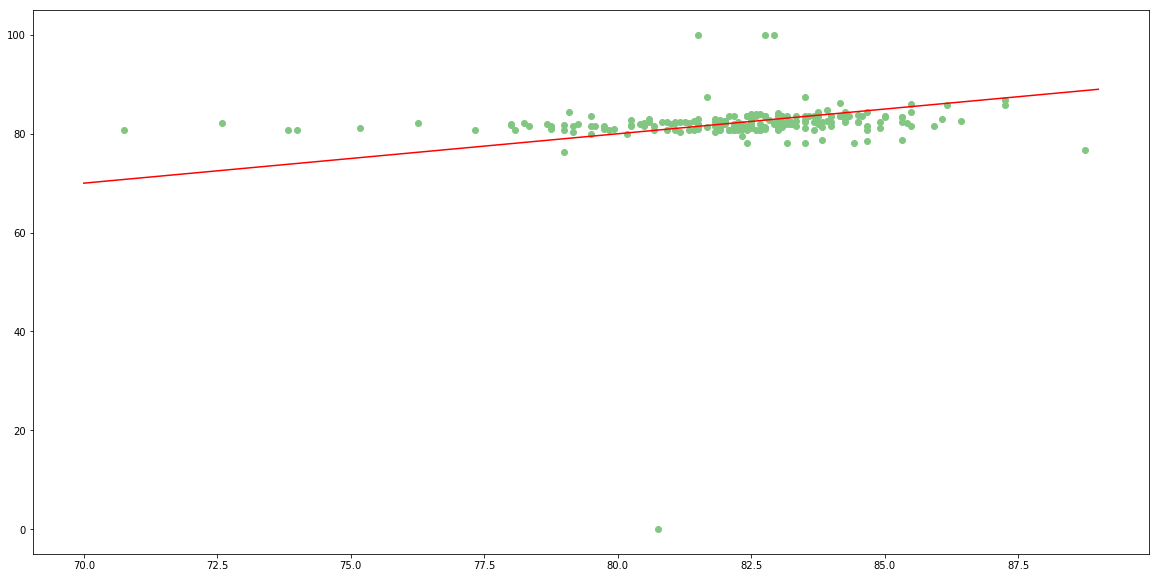

In [25]:
# keeping only categoricals.

OHE_X = OHE_features.drop(columns=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points']);
#scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(OHE_X)
scaled_features_df = pd.DataFrame(X, index=OHE_X.index, columns=OHE_X.columns)
scaled_features_df.head()

#set up test/training sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

# fit model to training set
lm = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False).fit(X_train, y_train)
# you have a model now!
#time to test it.
#make predictions using testing set
predictions = lm.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))
# The coefficients
print("Coefficients:")
for x in X_test.columns:
    print("%s -" %x, lm.coef_[0][X_test.columns.get_loc(x)])
## The line / model
lm_df = pd.DataFrame(data = X_test)
lm_df['Target_Score'] = y_test
lm_df['Predicted'] = predictions
lm_df['Predicted'] = np.where(lm_df['Predicted']>100, 100, lm_df['Predicted'] )
lm_df['Predicted'] = np.where(lm_df['Predicted']<0, 0, lm_df['Predicted'] )     # record and drop rows instead
lm_df.head()

plot = pd.DataFrame(data = lm_df['Target_Score'])
plot['Predicted'] = lm_df['Predicted']

#sns.scatterplot(data=plot)
plt.figure(figsize=(20,10))
plt.scatter(plot['Target_Score'],plot['Predicted'])
plt.plot(range(70,90),range(70,90), 'r')
#lm_df['Predicted'].describe()

### Future TODO

- look at random forest for prediction
- look at different targets
- When does PCA break down? (report in paper and explain why it changed with removal of numerical data)
- "Limitations" section on data


- record and drop coffees that were predicted wild.
- Summary statistics for categoricals?
- When does PCA break down 
    = doesn't work well for categorical data, especially OHE because it's not continuous 
- anova?
    = testing different models, for example comparing PCA with and without numeric data

# Random Forest

In [26]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = y
print(y[:10])
# Remove the labels from the features
# axis 1 refers to the columns
features = OHE_X
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# training/test set
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

[[89.92]
 [88.83]
 [88.75]
 [88.25]
 [87.92]
 [87.92]
 [87.58]
 [87.25]
 [87.25]
 [87.25]]
Training Features Shape: (814, 65)
Training Labels Shape: (814, 1)
Testing Features Shape: (272, 65)
Testing Labels Shape: (272, 1)


1. One-hot encoded categorical variables
2. Split data into features and labels
3. Converted to arrays
4. Split data into training and testing sets

In [27]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
